In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('cost_revenue_dirty.csv')

In [35]:
row = df.shape[0]
column = df.shape[1]
print(f'There are {row} rows and {column} columns')
print(df.columns)

There are 5391 rows and 6 columns
Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')


In [36]:
df.isna().values.any()

False

In [37]:
df.duplicated().values.any()

False

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [39]:
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [40]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [41]:
df['USD_Production_Budget'] = df['USD_Production_Budget'].apply(lambda x : x[1:]).str.replace(',', '')

In [42]:
df['USD_Worldwide_Gross'] = df['USD_Worldwide_Gross'].apply(lambda x : x[1:]).str.replace(',', '')

In [43]:
df['USD_Domestic_Gross'] = df['USD_Domestic_Gross'].apply(lambda x : x[1:]).str.replace(',', '')

In [44]:
df['USD_Production_Budget'] = pd.to_numeric(df['USD_Production_Budget'])

In [45]:
df['USD_Worldwide_Gross'] = pd.to_numeric(df['USD_Worldwide_Gross'])

In [46]:
df['USD_Domestic_Gross'] = pd.to_numeric(df['USD_Domestic_Gross'])

In [47]:
df.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object

In [48]:
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


What is the average production budget of the films in the data set?

In [49]:
average_production = df['USD_Production_Budget'].mean()
average_production.round()

31113738.0

What is the average worldwide gross revenue of films?


In [50]:
worldwide_gross = df['USD_Worldwide_Gross'].mean()
round(worldwide_gross, 0)

88855422.0

What were the minimums for worldwide and domestic revenue?

In [51]:
min_worldwide_gross = "{:,.2f}".format(df['USD_Worldwide_Gross'].min())
min_domestic_gross = "{:,.2f}".format(df['USD_Domestic_Gross'].min())
print(f'Domestic: {min_domestic_gross} \nWorldwide: {min_worldwide_gross}')

Domestic: 0.00 
Worldwide: 0.00


In [52]:
production = df.sort_values(['USD_Worldwide_Gross', 'USD_Production_Budget'], ascending=[True, False])
production.head(25)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5092,1435,2015-12-31,The Crow,40000000,0,0
3300,1631,2008-12-31,Black Water Transit,35000000,0,0
5045,1656,2015-10-30,Freaks of Nature,33000000,0,0


Are the bottom 25% of films actually profitable or do they lose money?

In [53]:
df.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5391,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,2003-09-19 15:02:02.203672704,3.111374e+07,8.885542e+07,4.123552e+07
min,1.000000,1915-08-02 00:00:00,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,1999-12-02 12:00:00,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,2006-06-23 00:00:00,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,2011-11-23 00:00:00,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,2020-12-31 00:00:00,4.250000e+08,2.783919e+09,9.366622e+08
std,1556.391981,NaN,4.052380e+07,1.684578e+08,6.602935e+07


What are the highest production budget and highest worldwide gross revenue of any film?



In [54]:
highest_production = "{:,.2f}".format(df['USD_Production_Budget'].max())
highest_ww_gross = "{:,.2f}".format(df['USD_Worldwide_Gross'].max())
print(f'Production: {highest_production} \nWorldwide: {highest_ww_gross}')

Production: 425,000,000.00 
Worldwide: 2,783,918,982.00


In [55]:
df.sort_values('USD_Production_Budget', ascending=False).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [56]:
df.sort_values('USD_Worldwide_Gross', ascending=False).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


How much revenue did the lowest and highest budget films make?

In [57]:
df['Profit'] = df['USD_Worldwide_Gross'] + df['USD_Domestic_Gross'] - df['USD_Production_Budget']

In [58]:
df.sort_values('Profit', ascending=False).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,3119426607


In [59]:
df.sort_values('Profit').head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000


How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [60]:
df[df['USD_Domestic_Gross']==0].count().iloc[0]
# df['USD_Domestic_Gross'].value_counts()

512

In [61]:
df[df['USD_Domestic_Gross']==0].sort_values('USD_Production_Budget', ascending=False).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000


How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally (i.e., the biggest flops)?

In [62]:
df[df['USD_Worldwide_Gross']==0].count().iloc[0]

357

In [63]:
df[df['USD_Worldwide_Gross']==0].sort_values('USD_Production_Budget', ascending=False).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000


<h2>Filter on Multiple Conditions: International Films</h2>

In [66]:
df.sort_values(['USD_Production_Budget', 'USD_Worldwide_Gross'], ascending=[True, False])

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041,360982
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0,-1400
2462,5388,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-2324
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000
1209,5387,1999-02-04,Following,6000,240495,48482,282977
...,...,...,...,...,...,...,...
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115,74304230
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425,972840850
4925,4,2015-06-11,Spectre,300000000,879620923,200074175,779695098
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225,2689324450


In [68]:
international_releases = df.loc[(df['USD_Domestic_Gross']==0) & (df['USD_Worldwide_Gross']!=0)]
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527


In [78]:
df.query("USD_Domestic_Gross==0 and USD_Worldwide_Gross!=0")

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527


<h3>Unreleased Films</h3>

In [81]:
scrape_data = pd.Timestamp('2018-05-01')
unreleased_movies = df[df['Release_Date'] >= scrape_data]
unreleased_movies

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5386,2950,2018-10-08,Meg,15000000,0,0,-15000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0,-20000000


In [83]:
data_clean = df.drop(unreleased_movies.index)

In [85]:
data_clean.sort_values('Release_Date', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0,-20000000
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,61700686
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,4187674
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,544190539
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,218923174
...,...,...,...,...,...,...,...
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,32755000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,5900000
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,15800000
1,5140,1916-05-09,Intolerance,385907,0,0,-385907


<h3>Bonus Challenge: Films that Lost Money</h3>

In [103]:
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross + USD_Domestic_Gross')
percentage = (money_losing.shape[0]/data_clean.shape[0])*100
print(f'{"{:.0f}".format(percentage)}%')

28%


<h1>Seaborn Data Visualisation: Bubble Charts</h1>

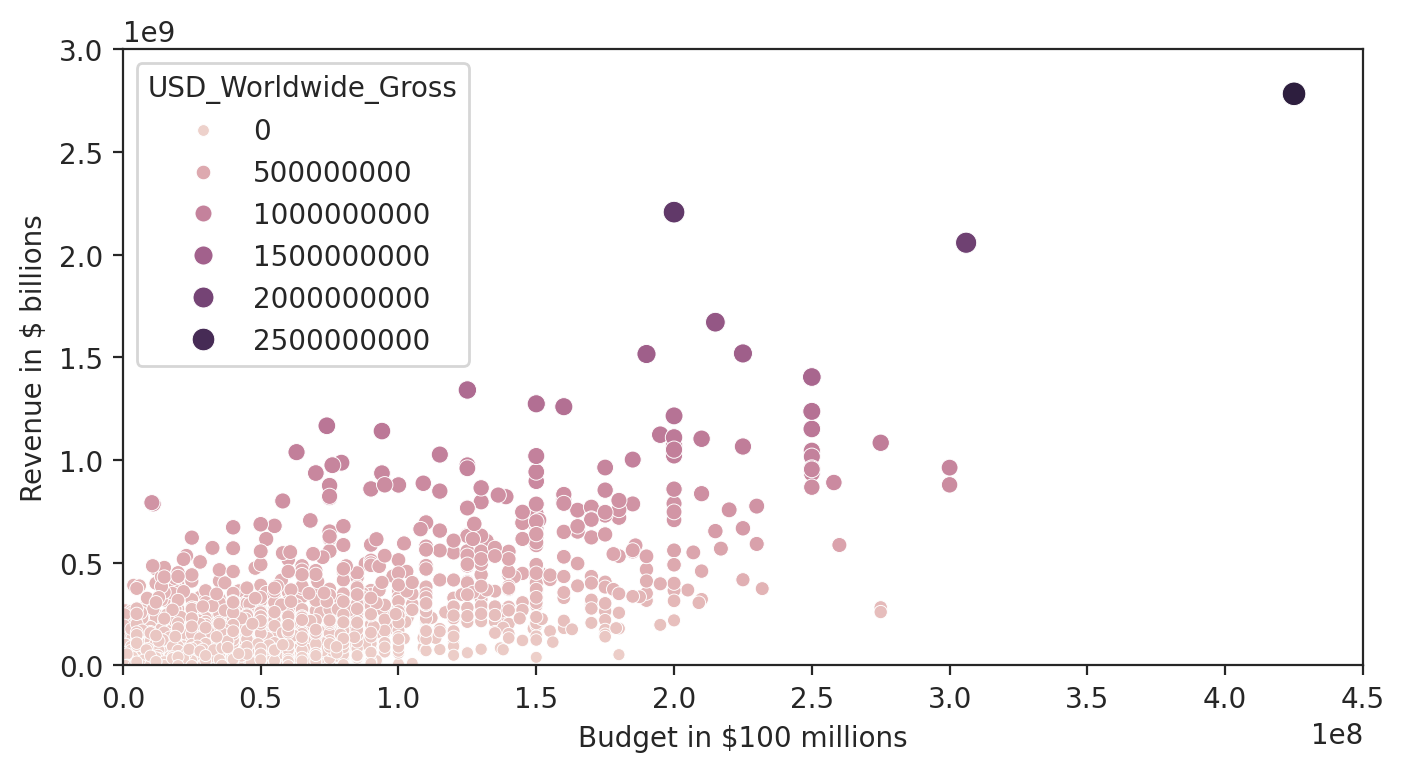

In [122]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('ticks'):

    ax = sns.scatterplot(data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')

    ax.set(ylim=(0, 3000000000), xlim=(0,450000000), ylabel='Revenue in $ billions', xlabel='Budget in $100 millions')

plt.show()

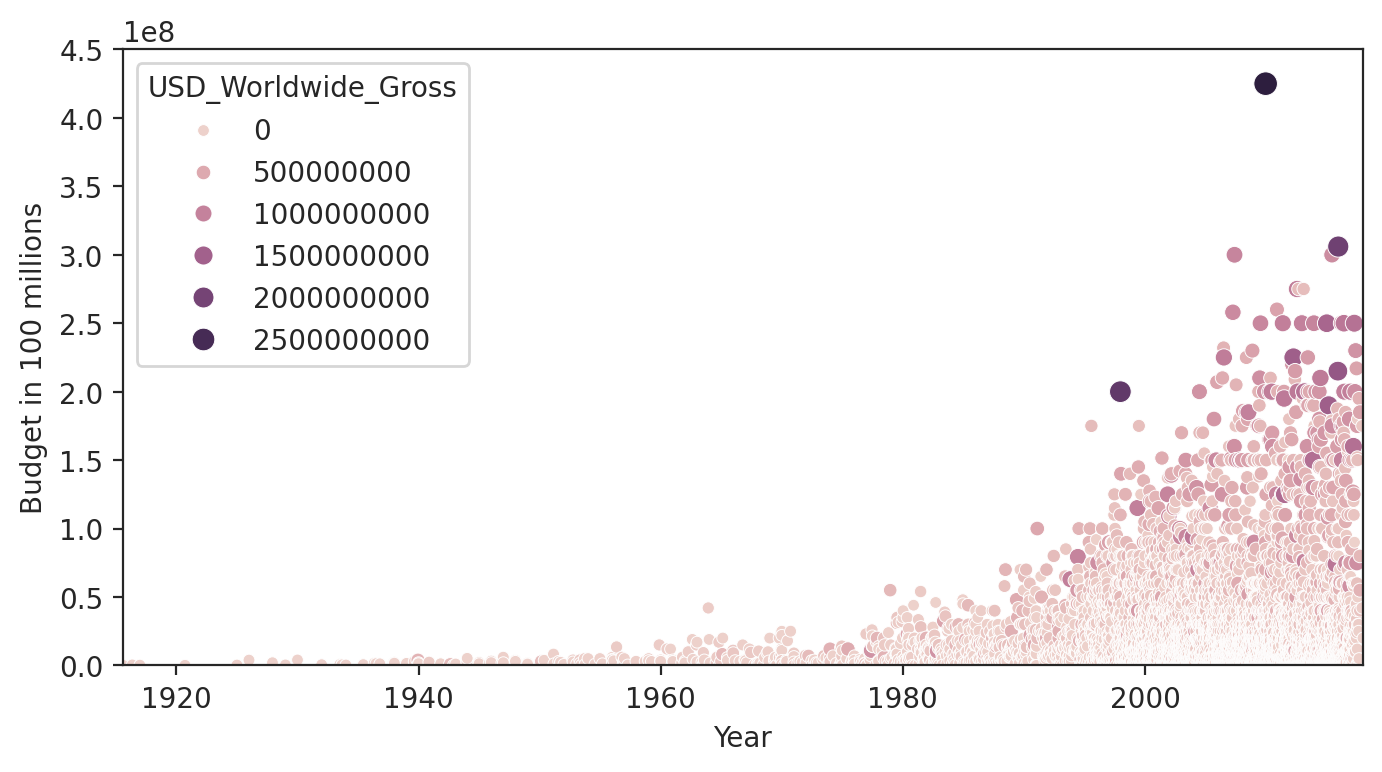

In [129]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('ticks'):

    ax = sns.scatterplot(data_clean, x='Release_Date', y='USD_Production_Budget', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')

    ax.set(ylim=(0, 450000000), xlim=(data_clean['Release_Date'].min(), data_clean['Release_Date'].max()), ylabel='Budget in 100 millions', xlabel='Year')

plt.show()

In [138]:
dt_index = pd.DatetimeIndex(data_clean['Release_Date'])
years = dt_index.year
decade = (years//10)*10
data_clean['Decade'] = decade

In [139]:
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,20890000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,-385907,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,15800000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,5900000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,32755000,1920
...,...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,218923174,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,544190539,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,4187674,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,61700686,2010


In [144]:
old_films = data_clean[data_clean['Decade'] < 1970]
new_films = data_clean[data_clean['Decade']>= 1970]
old_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,20890000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,-385907,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,15800000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,5900000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,32755000,1920
...,...,...,...,...,...,...,...,...
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,43357556,1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,6000000,102308900,102308900,198617800,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,42416198,1960
151,3613,1969-12-18,On Her Majesty's Secret Service,8000000,82000000,22800000,96800000,1960


In [148]:
print(old_films.shape[0])
old_films.sort_values('USD_Production_Budget', ascending=False).head(1)

153


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,86000000,1960


<h1>Plotting Linear Regressions with Seaborn</h1>

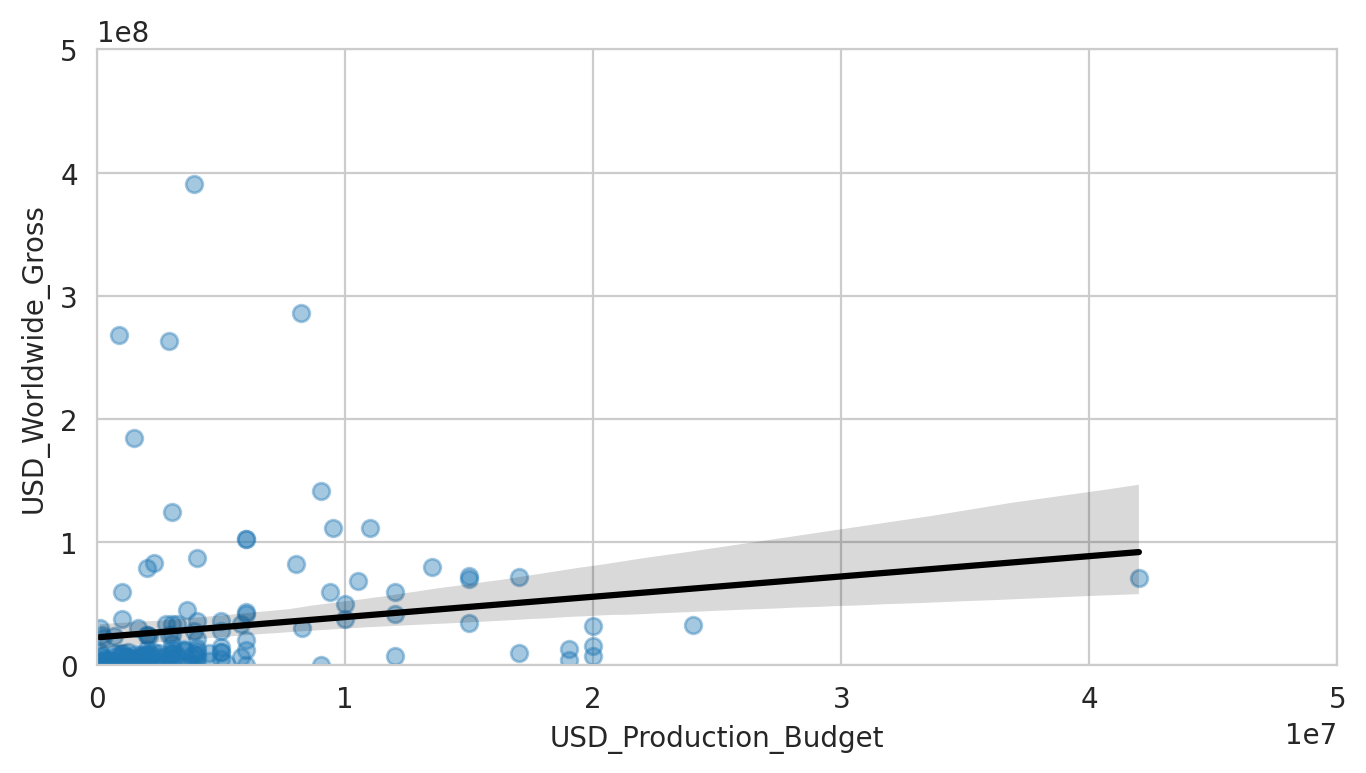

In [163]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('whitegrid'):
    ax = sns.regplot(old_films, x='USD_Production_Budget', y='USD_Worldwide_Gross', scatter_kws={'alpha': 0.4}, line_kws = {'color': 'black'})
    ax.set(xlim=(0, 50000000), ylim=(0, 500000000))


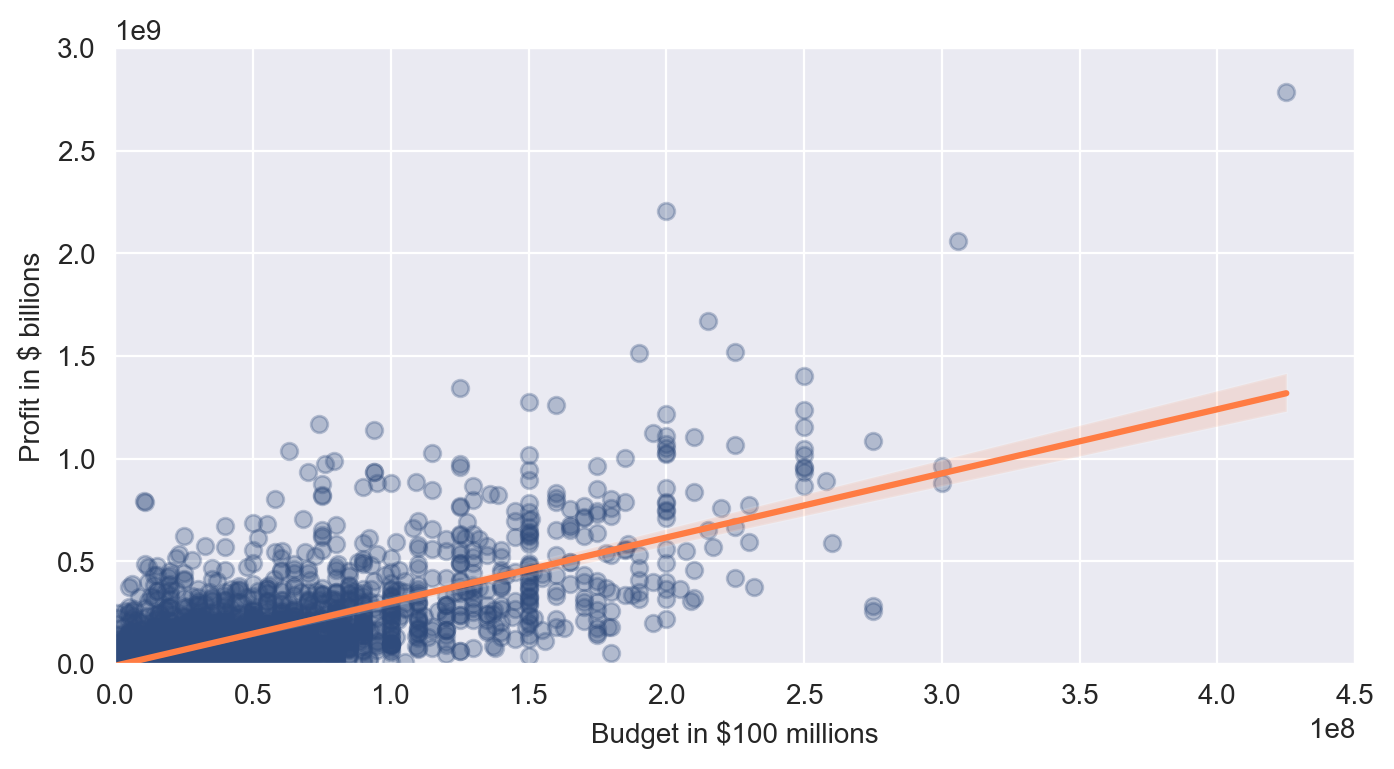

In [159]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.regplot(new_films,
        x='USD_Production_Budget',
        y='USD_Worldwide_Gross',
        color='#2f4b7c',
        scatter_kws={'alpha': 0.3},
        line_kws = {'color': '#ff7c43'})
    
    ax.set(xlim=(0, 450000000), ylim=(0, 3000000000), xlabel='Budget in $100 millions', ylabel='Profit in $ billions')

    plt.show()
